In [26]:
import pandas as pd
import sys
sys.path.append("/Users/peterpriestley/hmf/repos/scripts/analysisscripts") 
import chromosomeDefinition as cd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
PATH="/Users/peterpriestley/hmf/analyses/161211_qdnaseq_analysis/CPCT02030250/"
FILENAME = "CPCT02030250T_BAF.txt"
dfBAF = pd.read_table(PATH + FILENAME,names=["Chromosome","Position","variant",'AF'])

In [17]:
dfBAF.head()

,Chromosome,Position,variant,AF
0,1,882803,A>G,0.46
1,1,888659,T>C,0.53
2,1,903426,C>.,false
3,1,904355,C>.,false
4,1,918270,C>.,false


In [18]:
dfBAF=dfBAF[dfBAF.AF<>"false"]


In [19]:
len(dfBAF)

310418

In [20]:
dfBAF['chromPos']= dfBAF['Chromosome'].apply(lambda x: cd.intChrom(x)) + dfBAF['Position'] / dfBAF['Chromosome'].apply(lambda x: cd.chromosomeLength[str(x)])

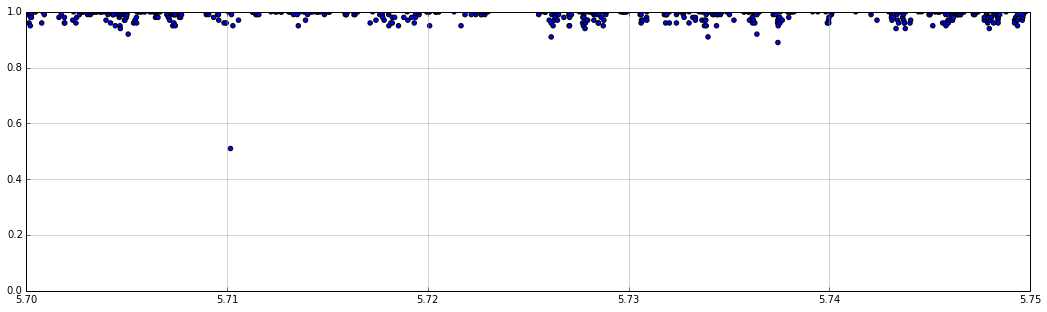

In [32]:
c = 1
fractionMin = 0.7
fractionMax = 0.75
dftemp = dfBAF[(dfBAF.chromPos>c+fractionMin)&(dfBAF.chromPos<c+fractionMax)]
plt.figure(figsize=[18,5])
plt.scatter(dftemp.chromPos, dftemp.AF)
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.axis([c+fractionMin, c+fractionMax,0, 1])
plt.show()